In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [3]:
df_article = pd.read_csv("./reuters_article.csv", dtype={'label': 'str'}, encoding="utf-8")
df_sentence = pd.read_csv("./dataset.csv", dtype={'label': 'str', 'predict':'str'}, encoding="utf-8")

In [4]:
#文のラベルから文章のベクトルへ
article_predlabel = []
parent = 0
value = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
for i in range(len(df_sentence)):
        if(parent != df_sentence["parentid"][i]):
#             print(value)
#             print(count)
            article_predlabel.append(value)
            value = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
            parent += 1

        if(parent == df_sentence["parentid"][i]):
            for j in range(14):
                value[j] += int(df_sentence["predict"][i][j])

article_predlabel.append(value)

In [10]:
# print(article_predlabel)

pred_label = []
for label in article_predlabel:
    temp = ""
    for l in label:
        temp += str(l)
    pred_label.append(temp)

print(pred_label)

['00001001000003', '20000000000001', '00000000000303', '40030000000003', '300000010010014', '20010011001001', '50000100000004', '50000000000001', '50000000000001', '10010001000009', '00000020000004', '00000000000006', '00020210000002', '10000010010003', '00000000000006', '00000010000003', '00001001000001', '00000000000007', '10001000000003', '00000100000002', '10000020000000', '30010000000004', '00010100000019', '100000010000017', '300200210000017', '00020000000004', '10121014000017', '20000020000002', '10000000001004', '00020100000001', '00000000000004', '100000100010010', '00000000000007', '30030000020001', '30030000020001', '00000000000004', '00000060000005', '10010000000007', '400100000000011', '10020000000008', '00000010000001', '00030000000003', '00000000000002', '00000000000003', '20030000000026', '80010001000001', '60010100000008', '01010000000001', '01000000000000', '50030010000005', '60000000000006', '50002000000006', '33030100010002', '00000000000008', '00000000000103', '300

In [2]:
from sklearn.decomposition import PCA

In [6]:
from matplotlib import pyplot as plt

In [7]:
pca = PCA()
pca.fit(article_predlabel)
transformed = pca.fit_transform(article_predlabel)
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.title('principan component')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0,0.5,'pc2')

In [9]:
print(pca.explained_variance_ratio_)

[ 0.51924219  0.20094445  0.0784472   0.04417012  0.03637048  0.02935044
  0.02446238  0.01860626  0.01376871  0.01130607  0.00938899  0.0073425
  0.00556903  0.00103116]


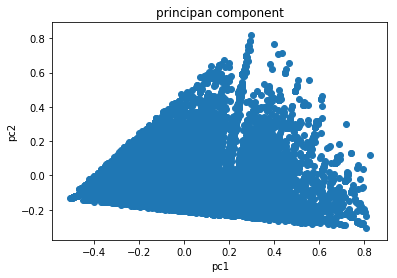

In [8]:
plt.show()

In [44]:
print(article_predlabel[0:100])

[array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.16666667,
        0.        ,  0.        ,  0.16666667,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.5       ]), array([ 0.5 ,  0.  ,  0.  ,  0.  ,  0.25,  0.  ,  0.  ,  0.25,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  1.  ]), array([ 0.28571429,  0.        ,  0.        ,  0.        ,  0.14285714,
        0.        ,  0.        ,  0.14285714,  0.        ,  0.        ,
        0.        ,  0.42857143,  0.        ,  1.        ]), array([ 0.6,  0. ,  0. ,  0.3,  0.1,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,
        0.3,  0. ,  1. ]), array([ 0.45,  0.  ,  0.  ,  0.15,  0.05,  0.  ,  0.  ,  0.1 ,  0.  ,
        0.  ,  0.05,  0.15,  0.  ,  1.2 ]), array([ 1.83333333,  0.        ,  0.        ,  0.66666667,  0.16666667,
        0.        ,  0.16666667,  0.5       ,  0.        ,  0.        ,
        0.33333333,  0.5       ,  0.        ,  4.16666667]), array([ 1.45454545,  0.        ,  0.        ,  0.3636363

In [48]:
print(len(df_article))
print(len(article_predlabel))

23969
23969


In [49]:
pred = KMeans(n_clusters=14).fit_predict(article_predlabel)

In [50]:
print(pred)

[ 8  4  5 ...,  5 13  6]


In [51]:
df_article["cluster"] = pred


In [52]:
df_article.to_csv("cluster.csv")

In [35]:
print(article_predlabel[0][0])

0.0


In [70]:
cluster_df = pd.DataFrame({'pred': pred,\
                           'keiki':[article_predlabel[i][0] for i in range(len(article_predlabel))],\
                           'bukka':[article_predlabel[i][1] for i in range(len(article_predlabel))],\
                           'kinri':[article_predlabel[i][2] for i in range(len(article_predlabel))],\
                          'money':[article_predlabel[i][3] for i in range(len(article_predlabel))],\
                          'boueki':[article_predlabel[i][4] for i in range(len(article_predlabel))],\
                          'koyou':[article_predlabel[i][5] for i in range(len(article_predlabel))],\
                          'kojin':[article_predlabel[i][6] for i in range(len(article_predlabel))],\
                          'kainyu':[article_predlabel[i][7] for i in range(len(article_predlabel))],\
                          'oil':[article_predlabel[i][8] for i in range(len(article_predlabel))],\
                          'kabu':[article_predlabel[i][9] for i in range(len(article_predlabel))],\
                          'saiken':[article_predlabel[i][10] for i in range(len(article_predlabel))],\
                          'youjin':[article_predlabel[i][11] for i in range(len(article_predlabel))],\
                          'seiji':[article_predlabel[i][12] for i in range(len(article_predlabel))],\
                          'sonota':[article_predlabel[i][13] for i in range(len(article_predlabel))]})

In [54]:
df_article['cluster'].value_counts()

10    3676
0     3199
6     3132
4     2910
5     2839
13    2054
12    1325
11    1217
8      775
3      733
2      656
7      570
1      518
9      365
Name: cluster, dtype: int64

In [71]:
cluster_df[cluster_df['pred'] == 0].mean()

boueki    0.005323
bukka     0.004048
kabu      0.010268
kainyu    0.013681
keiki     0.189835
kinri     0.000567
kojin     0.016951
koyou     0.009412
money     0.026828
oil       0.002774
pred      0.000000
saiken    0.005833
seiji     0.004437
sonota    0.631136
youjin    0.001148
dtype: float64

In [72]:
cluster_df[cluster_df['pred'] == 1].mean()

boueki    0.037820
bukka     0.003359
kabu      0.012712
kainyu    0.030481
keiki     0.230740
kinri     0.001327
kojin     0.023661
koyou     0.266333
money     0.095217
oil       0.003817
pred      1.000000
saiken    0.008415
seiji     0.013290
sonota    0.290728
youjin    0.005928
dtype: float64

In [73]:
cluster_df[cluster_df['pred'] == 2].mean()

boueki    0.009347
bukka     0.013345
kabu      0.017255
kainyu    0.040124
keiki     0.133185
kinri     0.000964
kojin     0.046900
koyou     0.025503
money     0.487207
oil       0.006066
pred      2.000000
saiken    0.007048
seiji     0.010088
sonota    0.193404
youjin    0.007068
dtype: float64

In [74]:
cluster_df[cluster_df['pred'] == 3].mean()

boueki    0.007192
bukka     0.006963
kabu      0.011457
kainyu    0.012936
keiki     0.103038
kinri     0.001330
kojin     0.319808
koyou     0.008631
money     0.053108
oil       0.005528
pred      3.000000
saiken    0.015171
seiji     0.005975
sonota    0.363865
youjin    0.007279
dtype: float64

In [75]:
cluster_df[cluster_df['pred'] == 4].mean()

boueki    0.011176
bukka     0.003632
kabu      0.010907
kainyu    0.019071
keiki     0.458052
kinri     0.000652
kojin     0.019229
koyou     0.015952
money     0.036260
oil       0.002758
pred      4.000000
saiken    0.006750
seiji     0.004626
sonota    0.353671
youjin    0.001867
dtype: float64

In [76]:
cluster_df[cluster_df['pred'] == 5].mean()

boueki    0.007928
bukka     0.006773
kabu      0.016974
kainyu    0.025016
keiki     0.040102
kinri     0.000953
kojin     0.025394
koyou     0.012701
money     0.117861
oil       0.009474
pred      5.000000
saiken    0.014879
seiji     0.009837
sonota    0.603802
youjin    0.003200
dtype: float64

In [77]:
cluster_df[cluster_df['pred'] == 6].mean()

boueki    0.002851
bukka     0.002188
kabu      0.006925
kainyu    0.010569
keiki     0.029355
kinri     0.000415
kojin     0.011119
koyou     0.003866
money     0.019488
oil       0.002620
pred      6.000000
saiken    0.005362
seiji     0.002687
sonota    0.775056
youjin    0.000662
dtype: float64

In [78]:
cluster_df[cluster_df['pred'] == 7].mean()

boueki    0.018475
bukka     0.012115
kabu      0.179656
kainyu    0.018035
keiki     0.110710
kinri     0.001871
kojin     0.017139
koyou     0.013277
money     0.062178
oil       0.029958
pred      7.000000
saiken    0.035149
seiji     0.028951
sonota    0.301624
youjin    0.018504
dtype: float64

In [79]:
cluster_df[cluster_df['pred'] == 8].mean()

boueki    0.021516
bukka     0.004780
kabu      0.009570
kainyu    0.260949
keiki     0.103990
kinri     0.001451
kojin     0.016340
koyou     0.026232
money     0.080083
oil       0.003249
pred      8.000000
saiken    0.006563
seiji     0.010981
sonota    0.379304
youjin    0.005019
dtype: float64

In [80]:
cluster_df[cluster_df['pred'] == 9].mean()

boueki    0.007158
bukka     0.426447
kabu      0.023468
kainyu    0.015176
keiki     0.150269
kinri     0.000913
kojin     0.015323
koyou     0.010550
money     0.104383
oil       0.006478
pred      9.000000
saiken    0.001550
seiji     0.002009
sonota    0.214870
youjin    0.008490
dtype: float64

In [81]:
cluster_df[cluster_df['pred'] == 10].mean()

boueki     0.010006
bukka      0.003569
kabu       0.009311
kainyu     0.015195
keiki      0.309814
kinri      0.000737
kojin      0.018405
koyou      0.012985
money      0.049027
oil        0.002391
pred      10.000000
saiken     0.008162
seiji      0.005122
sonota     0.499143
youjin     0.001619
dtype: float64

In [82]:
cluster_df[cluster_df['pred'] == 11].mean()

boueki     0.015723
bukka      0.008029
kabu       0.009957
kainyu     0.025035
keiki      0.657859
kinri      0.000993
kojin      0.016606
koyou      0.031246
money      0.058555
oil        0.002575
pred      11.000000
saiken     0.008515
seiji      0.004374
sonota     0.132127
youjin     0.001493
dtype: float64

In [83]:
cluster_df[cluster_df['pred'] == 12].mean()

boueki     0.015740
bukka      0.008153
kabu       0.019892
kainyu     0.043460
keiki      0.368031
kinri      0.001524
kojin      0.037250
koyou      0.028268
money      0.254971
oil        0.004979
pred      12.000000
saiken     0.009491
seiji      0.011441
sonota     0.217962
youjin     0.007294
dtype: float64

In [84]:
cluster_df[cluster_df['pred'] == 13].mean()

boueki     0.010474
bukka      0.007098
kabu       0.013727
kainyu     0.019823
keiki      0.106303
kinri      0.001040
kojin      0.018765
koyou      0.014525
money      0.270436
oil        0.004618
pred      13.000000
saiken     0.006877
seiji      0.010782
sonota     0.445206
youjin     0.004026
dtype: float64